In [ ]:
# mounting on Google Drive,below 2 lines helps in getting the authorization code by loggin into your Google account
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Required packages installation
!pip install imgaug==0.4.0


     |████████████████████████████████| 952kB 8.2MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [ ]:
# Importing all the required libraries
import os
import random
import numpy as np
import cv2

import matplotlib.pyplot as plt
import imgaug as ia
import imgaug.augmenters as iaa

In [ ]:
"""
  This script is used to augment the images of the irregular images
"""
INPUT_DIRECTORY = "/gdrive/Shareddrives/ALDA_Project/data/web_scraping_meghana/irregular"

RESIZED_OUTPUT_DIRECTORY = "/gdrive/Shareddrives/ALDA_Project/data/web_scraping_meghana/irregular_resized"

AUG_OUTPUT_DIRECTORY = "/gdrive/Shareddrives/ALDA_Project/data/web_scraping_meghana/irregular_aug"

IMAGE_SIDE_LENGTH = 128
NUMBER_IMAGES =1000
GROUP_NUMBER = 11

In [ ]:
# Resizing all images in input_dir
filenames = os.listdir(INPUT_DIRECTORY)
for filename in filenames:
  temp = cv2.imread(os.path.join(INPUT_DIRECTORY, filename))
  temp = cv2.resize(temp, (IMAGE_SIDE_LENGTH, IMAGE_SIDE_LENGTH))
  cv2.imwrite(os.path.join(RESIZED_OUTPUT_DIRECTORY, filename), temp)

In [ ]:
# Loading a thousand images into memory
images = np.zeros((1, IMAGE_SIDE_LENGTH, IMAGE_SIDE_LENGTH, 3), dtype = np.uint8)
filenames = os.listdir(RESIZED_OUTPUT_DIRECTORY)

original_images = len(filenames)

counter = 0
while(images.shape[0] < NUMBER_IMAGES +1):
  # Choose a random index
  choice = random.randint(0, original_images-1)
  # Image file to read (from random index chosen)
  temp = cv2.imread(os.path.join(RESIZED_OUTPUT_DIRECTORY, filenames[choice]))
  # Expand the dimensions of the image you have read in
  temp = np.expand_dims(temp, axis = 0)
  
  counter +=1
  # Concatenate to image directory
  images = np.concatenate((images, temp), axis = 0)

  if counter % 100 ==0:
    print(str(counter), "images loaded.")
images = images[1:]

print(images.shape)

100 images loaded.
200 images loaded.
300 images loaded.
400 images loaded.
500 images loaded.
600 images loaded.
700 images loaded.
800 images loaded.
900 images loaded.
1000 images loaded.
(1000, 128, 128, 3)


In [ ]:
# Sample 15 images
cols = 9
rows = 5

row_images = []

for i in range(rows):
  indices = np.random.rand(cols)
  indices = (indices*NUMBER_IMAGES).astype(np.int64)  

  row = images[indices[0], ...]
  for j in range(1, cols):
    row = np.hstack((row, images[indices[j]]))
  
  row_images.append(row[:])

image = row_images[0]
for i in range(1, rows):
  image = np.vstack((image, row_images[i]))
# Display 
plt.figure(figsize=(cols*3, rows*3))
plt.imshow(image)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ia.seed(GROUP_NUMBER)
#Using augmenter to augment the image
sequential_augmenter = iaa.Sequential([
                                        iaa.ChannelShuffle(0.35),
                                        iaa.ScaleX((0.9, 1.1)),
                                        iaa.ScaleY((0.9, 1.1)),
                                        iaa.Sometimes(0.5, iaa.OneOf([iaa.Fliplr(), iaa.Flipud()])),
                                        iaa.Sometimes(0.5, iaa.Rot90((1,3))),
                                       ], random_order = True)

augmented_images = sequential_augmenter.augment_images(images)

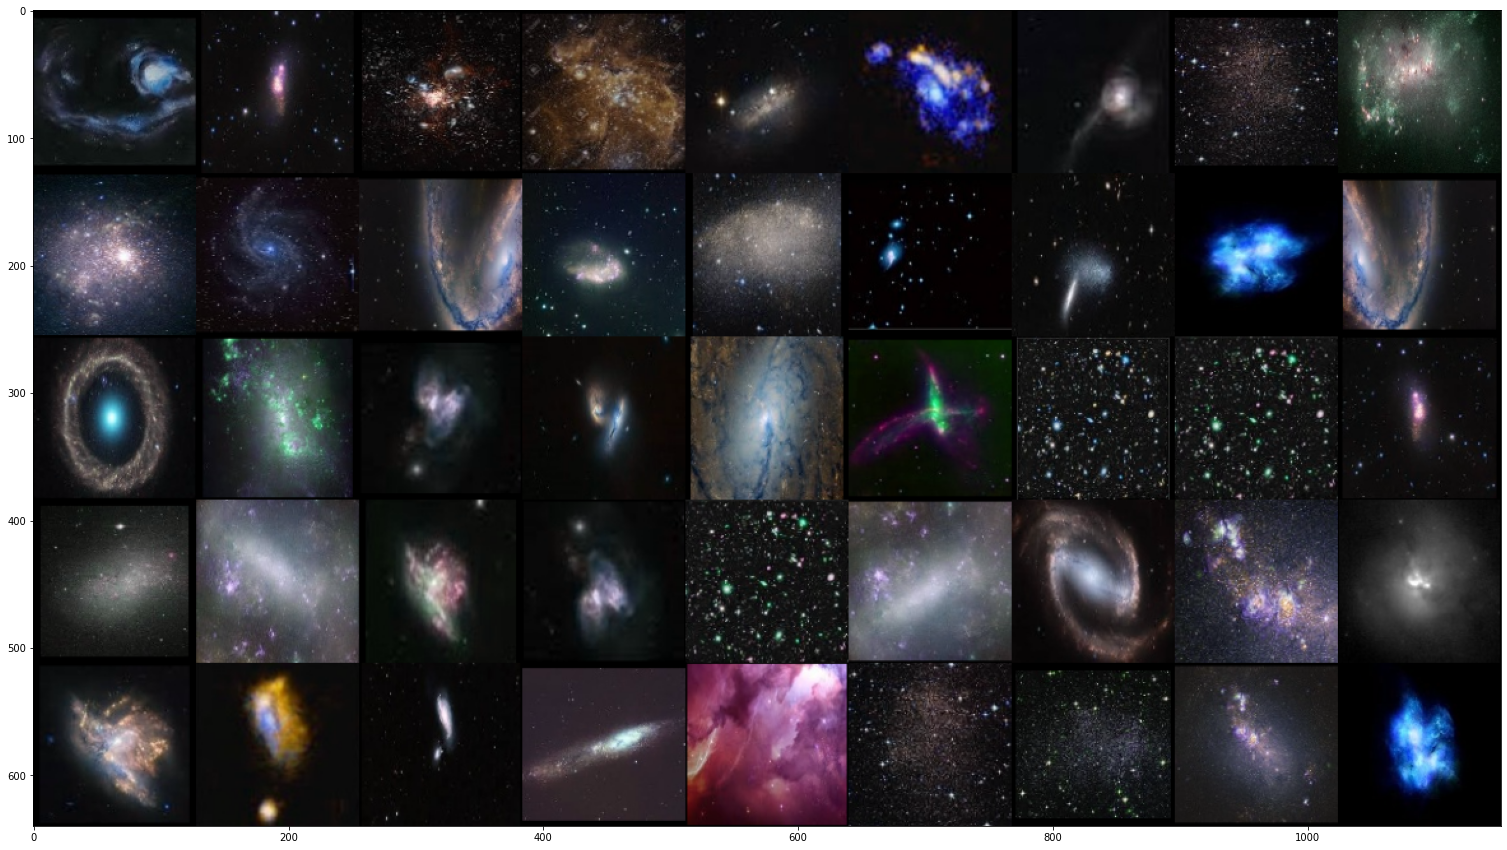

In [ ]:
# Sample 15 images
cols = 9
rows = 5

row_images = []

for i in range(rows):
  indices = np.random.rand(cols)
  indices = (indices*NUMBER_IMAGES).astype(np.int64)  

  row = augmented_images[indices[0], ...]
  for j in range(1, cols):
    row = np.hstack((row, augmented_images[indices[j]]))
  
  row_images.append(row[:])

image = row_images[0]
for i in range(1, rows):
  image = np.vstack((image, row_images[i]))

plt.figure(figsize=(cols*3, rows*3))
plt.imshow(image)

In [ ]:
#writing the images on the prescribed file path
for i in range(NUMBER_IMAGES):
  fname = "irregular_" + str(i) + ".jpg"
  cv2.imwrite(os.path.join(AUG_OUTPUT_DIRECTORY, fname), augmented_images[i])

  if i % 100 == 0:
    print(str(i), "images written to disk")

0 images written to disk
100 images written to disk
200 images written to disk
300 images written to disk
400 images written to disk
500 images written to disk
600 images written to disk
700 images written to disk
800 images written to disk
900 images written to disk
